Doctor Chatbot **Assistant**


In [ ]:
# Lawyer Assistant ("Aim to help in Court's cases help")

In [2]:
# install SDK
%pip install --quiet -U langchain_google_genai langchain_core langgraph

In [3]:
# google api key
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

In [4]:
# import chatmodel
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model = "gemini-1.5-flash",
    api_key=GEMINI_API_KEY,
    temperature=0,
)

In [5]:
# A testing of  chatmodel
response=llm.invoke("What is Pakistan Act 1973")
print(response)

content="The Pakistan Act, 1973, is the **constitution of Pakistan**.  It's the supreme law of the land, outlining the structure of the government, the fundamental rights of citizens, and the relationship between the different branches of government.  It replaced previous constitutions and established Pakistan as an Islamic Republic.  Key features include:\n\n* **Federal Parliamentary System:**  It establishes a federal parliamentary system with a President as head of state and a Prime Minister as head of government.\n* **Islamic Provisions:**  The constitution incorporates Islamic principles and designates Islam as the state religion.  However, it also guarantees religious freedom to minorities.\n* **Fundamental Rights:**  It guarantees fundamental rights to citizens, including freedom of speech, religion, and assembly, along with the right to education and equality before the law.\n* **Separation of Powers (to an extent):** While aiming for a separation of powers between the executiv

In [12]:
# use messagestate for building of state
from langgraph.graph import MessagesState
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

sys_msg = SystemMessage(content="You are a helpful Lawyer's assistant and helps in court cases")

# Node
def assistant(state: MessagesState) -> MessagesState:
   return {"messages": [llm.invoke([sys_msg] + state["messages"])]}

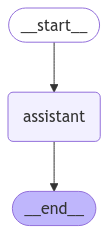

In [13]:
from langgraph.graph import START, StateGraph, END
from langgraph.graph.state import CompiledStateGraph
from IPython.display import Image, display

# Graph
Lawyer: StateGraph = StateGraph(MessagesState)

# Define nodes: nodes do the work
Lawyer.add_node("assistant", assistant)

# Define edges: these determine how the control flow moves
Lawyer.add_edge(START, "assistant")

Lawyer.add_edge("assistant", END)

lawyer_graph: CompiledStateGraph = Lawyer.compile()

# Show
display(Image(lawyer_graph.get_graph(xray=True).draw_mermaid_png()))

In [14]:
messages = [HumanMessage(content="What is marriage act in pakistan")]

messages = llm.invoke(messages)

In [15]:
print(messages)

content='The primary legislation governing marriage in Pakistan is the **Muslim Family Laws Ordinance, 1961**.  However, it\'s crucial to understand that Pakistan is a diverse country with various religious groups, and different laws apply depending on religious affiliation.\n\n**For Muslims:** The Muslim Family Laws Ordinance, 1961, covers aspects like:\n\n* **Marriage registration:**  While not mandatory in all cases, registration is encouraged and provides legal recognition of the marriage.\n* **Minimum age:**  Sets a minimum age for marriage, though enforcement varies.\n* **Dower (Mahr):**  Specifies the wife\'s right to receive a dower, a sum of money or property payable by the husband.\n* **Divorce:**  Outlines procedures for divorce, including the right of the wife to seek khula (divorce initiated by the wife).\n* **Custody of children:**  Addresses the custody and maintenance of children in case of divorce.\n* **Polygamy:**  Allows polygamy under certain conditions.\n\n**For No